In [99]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc
path='/home/student303/zz/almama/'
train = pd.read_hdf(path+ 'somefeature/base_feature_train_0.h5')
test = pd.read_hdf(path+ 'somefeature/base_feature_test_0.h5')
combine = [train, test]
print('Read Data Finish')

Read Data Finish


In [176]:
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [740]:
droplist = ['instance_id',
            'item_category_list',
            'item_property_list',
            'user_id',
            'context_id',
            'context_timestamp',
            'predict_category_property',
             'min', 'second',
            #'shop_id'，
            
            'user_nextclik_time_interval',
            'daily_clik_dup',
            'daily_first_clik_time',
            'daily_last_clik_time',
            'first_clik_poz',
            'top_three_clik_poz',
            'most_cilk_price',
            'top_three_cilk_price',
            'user_lastclik_time_interval',
            'clik_time_duration',
            'item_price_level->daily_last_clik_time_cnt',
            'user_day_diff_category',
            'clik_item_category_3',
            'user_day_clik_cnt',
            'tmp_index',
            'max_index',
            'cal_top_clik',
            #'user_clik_cnt',
            'min_index',
            'cal_tail_clik',
            'user_day_diff_category_true',
            'user_clik_frequency'

           ]
#df_test = test.drop(droplist, axis=1)
df_train = train.drop(droplist, axis=1)

In [742]:
train_X .columns

Index(['item_id', 'item_brand_id', 'item_city_id', 'item_price_level',
       'item_sales_level', 'item_collected_level', 'item_pv_level',
       'user_gender_id', 'user_age_level', 'user_occupation_id',
       'user_star_level', 'context_page_id', 'shop_id',
       'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery', 'shop_score_description',
       'item_category_hash', 'hour', 'user_clik_cnt'],
      dtype='object')

In [741]:
train_train = df_train[df_train.day != 24]
train_valid = df_train[df_train.day == 24]

train_X = train_train.drop(['is_trade','day'], axis=1)
train_y = train_train['is_trade'].values

valid_X = train_valid.drop(['is_trade','day'], axis=1)
valid_y = train_valid['is_trade'].values

#train_X, valid_X, train_y, valid_y = train_test_split(df_train, y_train['is_trade'], test_size = 0.1, random_state = 144) 

d_train = lgb.Dataset(train_X, label=train_y)
d_valid = lgb.Dataset(valid_X, label=valid_y)
watchlist = [d_train, d_valid]

print('LGBM training')
print(train_X.shape)
#lgb_train = lgb.Dataset(df_train.values, label = y_train.is_trade)
params = {
    'task': 'train',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth':4,
    #'num_leaves': 6,
    #'min_data_in_leaf':1,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 1.0,
    'verbose': 0,
}

model = lgb.train(params, train_set=d_train, num_boost_round=6000, valid_sets=watchlist, \
                  early_stopping_rounds=500, verbose_eval=50)
print('LGBM training done')

LGBM training
(420693, 22)
Train until valid scores didn't improve in 500 rounds.
[50]	training's binary_logloss: 0.0901372	valid_1's binary_logloss: 0.0830656
[100]	training's binary_logloss: 0.0879586	valid_1's binary_logloss: 0.0818672
[150]	training's binary_logloss: 0.0869848	valid_1's binary_logloss: 0.0818294
[200]	training's binary_logloss: 0.0862627	valid_1's binary_logloss: 0.081801
[250]	training's binary_logloss: 0.0855556	valid_1's binary_logloss: 0.081852
[300]	training's binary_logloss: 0.0849276	valid_1's binary_logloss: 0.0818943
[350]	training's binary_logloss: 0.0843525	valid_1's binary_logloss: 0.0819527
[400]	training's binary_logloss: 0.0838449	valid_1's binary_logloss: 0.082034
[450]	training's binary_logloss: 0.0833432	valid_1's binary_logloss: 0.0821068
[500]	training's binary_logloss: 0.0828829	valid_1's binary_logloss: 0.082199
[550]	training's binary_logloss: 0.0823836	valid_1's binary_logloss: 0.0822875
[600]	training's binary_logloss: 0.0819323	valid_1's b

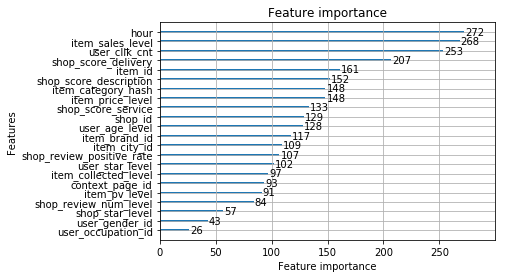

In [760]:
%matplotlib inline
lgb.plot_importance(model)

## 用户昨日最后一次点击到现在的时间间隔

In [191]:
df_train.columns

Index(['instance_id', 'item_id', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_timestamp',
       'context_page_id', 'shop_id', 'shop_review_num_level',
       'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
       'shop_score_delivery', 'shop_score_description', 'is_trade',
       'item_category_hash', 'day', 'hour', 'min', 'second', 'daily_clik_dup'],
      dtype='object')

In [2]:
import time
def timestamp_datetime(value):
    #format = '%Y-%m-%d %H:%M:%S'
    format = '%Y%m%d%H%M%S'    
    value = time.localtime(value)
    dt = time.strftime(format, value)
    return dt

In [103]:
train[train.user_id == 2692638157208937547][['context_timestamp','day','hour','min','second','is_trade']]

,context_timestamp,day,hour,min,second,is_trade
1,1537243232,18,12,0,32,0
19598,1537247404,18,13,10,4,0
31505,1537243304,18,12,1,44,0
38670,1537243232,18,12,0,32,0
62675,1537246805,18,13,0,5,0
73874,1537243232,18,12,0,32,0
76227,1537246571,18,12,56,11,0
77717,1537243167,18,11,59,27,0
169702,1537321621,19,9,47,1,0
183133,1537321621,19,9,47,1,0


## 用户最近三次点击不同item_id序列的hash

In [162]:
train[['user_id','item_id','day','min','second','is_trade']][train.user_id == 3854223874089995979]

,user_id,item_id,day,min,second,is_trade
3363,3854223874089995979,2709839111509701702,18,34,45,0
9197,3854223874089995979,3658984445149126874,18,32,17,0
29171,3854223874089995979,4685543250298086856,18,33,9,0
33785,3854223874089995979,7697581527441910922,18,31,45,0
33869,3854223874089995979,4339204808801654205,18,31,45,0
80156,3854223874089995979,5323767931396822716,21,55,12,0
81054,3854223874089995979,5467735841796001072,21,46,47,0
87886,3854223874089995979,4628629030303357696,21,43,22,0
88633,3854223874089995979,1967948096966846071,21,16,30,0
97190,3854223874089995979,8574148768443136881,21,40,51,0


## 用户当日重复点击该商品几次

In [183]:
user_clik_dup = train[['user_id','day','item_id','instance_id']].groupby(['user_id','day','item_id']).count().reset_index()
user_clik_dup.rename(columns = {'instance_id' : 'daily_clik_dup'},inplace=True)
train = pd.merge(train, user_clik_dup, on=['user_id','day','item_id'], how='left')

In [184]:
user_clik_dup = test[['user_id','day','item_id','instance_id']].groupby(['user_id','day','item_id']).count().reset_index()
user_clik_dup.rename(columns = {'instance_id' : 'daily_clik_dup'},inplace=True)
test = pd.merge(test, user_clik_dup, on=['user_id','day','item_id'], how='left')

In [226]:
#没加  0.0822897

# 加了 0.0822748

## 用户历史重复点击该商品第几次

## 用户每日第一次点击的时间

In [194]:
import time
def timestamp_datetime_from_day(value):
    #format = '%Y-%m-%d %H:%M:%S'
    format = '%Y%m%d%H%M%S'    
    value = time.localtime(value)
    dt = time.strftime(format, value)
    #return(int(dt))
    #return dt[8:] 
    return (int(dt[8:10])*60+ int(dt[10:12]))*60+int(dt[12:14])

In [195]:
user_first_clik_time = train[['user_id','day','context_timestamp']].groupby(['user_id','day']).min().reset_index()
user_first_clik_time.rename(columns = {'context_timestamp' : 'daily_first_clik_time'},inplace=True)
user_first_clik_time.daily_first_clik_time = user_first_clik_time.daily_first_clik_time.apply(timestamp_datetime_from_day)

train = pd.merge(train, user_first_clik_time, on=['user_id','day'], how='left')

In [196]:
user_first_clik_time = test[['user_id','day','context_timestamp']].groupby(['user_id','day']).min().reset_index()
user_first_clik_time.rename(columns = {'context_timestamp' : 'daily_first_clik_time'},inplace=True)
user_first_clik_time.daily_first_clik_time = user_first_clik_time.daily_first_clik_time.apply(timestamp_datetime_from_day)

test = pd.merge(test, user_first_clik_time, on=['user_id','day'], how='left')

In [225]:
#没加 0.0822897
#加了 0.082448

In [224]:
0.0822897 - 0.082448

-0.0001583000000000001

## 用户每日最后一次点击的时间

In [205]:
user_last_clik_time = train[['user_id','day','context_timestamp']].groupby(['user_id','day']).max().reset_index()
user_last_clik_time.rename(columns = {'context_timestamp' : 'daily_last_clik_time'},inplace=True)
user_last_clik_time.daily_last_clik_time = user_last_clik_time.daily_last_clik_time.apply(timestamp_datetime_from_day)

train = pd.merge(train, user_last_clik_time, on=['user_id','day'], how='left')

user_last_clik_time = test[['user_id','day','context_timestamp']].groupby(['user_id','day']).max().reset_index()
user_last_clik_time.rename(columns = {'context_timestamp' : 'daily_last_clik_time'},inplace=True)
user_last_clik_time.daily_last_clik_time = user_last_clik_time.daily_last_clik_time.apply(timestamp_datetime_from_day)

test = pd.merge(test, user_last_clik_time, on=['user_id','day'], how='left')

In [ ]:
#没加 0.0822897
#加了 0.0821369

In [222]:
0.0822897 - 0.0821369

0.0001527999999999946

## 用户当前点击与本日下一次点击的时间差 若没有则为-1

In [267]:
def cal_timegap(df, column = 'context_timestamp'):
    return df.sort_values(column, ascending=True)[['context_timestamp']]

def cal_timegap2(x):
    return abs(x.context_timestamp-x.context_timestamp.shift(-1))

def cal_timegap3(x):
    return abs(x.context_timestamp-x.context_timestamp.shift(1))

In [163]:
tmp_train = train[['user_id','item_id','day','context_timestamp']].groupby(['user_id','day','item_id']).apply(cal_timegap).reset_index()[['user_id','day','item_id','context_timestamp']]
tmp_test = test[['user_id','item_id','day','context_timestamp']].groupby(['user_id','day','item_id']).apply(cal_timegap).reset_index()[['user_id','day','item_id','context_timestamp']]

tmp_train['user_nextclik_time_interval'] = tmp_train.groupby(['user_id','day']).apply(cal_timegap2).reset_index()[['context_timestamp']]
tmp_test['user_nextclik_time_interval'] = tmp_test.groupby(['user_id','day']).apply(cal_timegap2).reset_index()[['context_timestamp']]

train = pd.merge(train, tmp_train[['user_id','item_id','context_timestamp','user_nextclik_time_interval']], on=['user_id','item_id','context_timestamp'], how='left')
test = pd.merge(test, tmp_test[['user_id','item_id','context_timestamp','user_nextclik_time_interval']], on=['user_id','item_id','context_timestamp'], how='left')

In [171]:
train.user_nextclik_time_interval = train.user_nextclik_time_interval.fillna(-1)

In [ ]:
#没加：0.0822897

#加了：0.0819887

In [223]:
0.0822897 - 0.0819887

0.0003009999999999957

## 用户当前点击与本日上一次点击的时间差 若没有则为-1

In [269]:
#tmp_train = train[['user_id','item_id','day','context_timestamp']].groupby(['user_id','day','item_id']).apply(cal_timegap).reset_index()[['user_id','day','item_id','context_timestamp']]
#tmp_test = test[['user_id','item_id','day','context_timestamp']].groupby(['user_id','day','item_id']).apply(cal_timegap).reset_index()[['user_id','day','item_id','context_timestamp']]

tmp_train['user_lastclik_time_interval'] = tmp_train.groupby(['user_id','day']).apply(cal_timegap3).reset_index()[['context_timestamp']]
tmp_test['user_lastclik_time_interval'] = tmp_test.groupby(['user_id','day']).apply(cal_timegap3).reset_index()[['context_timestamp']]

train = pd.merge(train, tmp_train[['user_id','item_id','context_timestamp','user_lastclik_time_interval']], on=['user_id','item_id','context_timestamp'], how='left')
test = pd.merge(test, tmp_test[['user_id','item_id','context_timestamp','user_lastclik_time_interval']], on=['user_id','item_id','context_timestamp'], how='left')
train.user_lastclik_time_interval = train.user_lastclik_time_interval.fillna(-1)

In [753]:
train[['user_id','day','user_nextclik_time_interval']]

,user_id,day,user_lastclik_time_interval
0,4505772604969228686,18,179.0
1,2692638157208937547,18,3339.0
2,5247924392014515924,18,182.0
3,2681414445369714628,18,-1.0
4,2729475788342039013,18,-1.0
5,4512655448325954611,18,1931.0
6,8811056487516803043,18,-1.0
7,6507704883896466138,18,-1.0
8,6203308008480593423,18,-1.0
9,6041712044514783312,18,-1.0


In [759]:
tmp_train[['user_id','day','context_timestamp']][tmp_train.user_id == 24779788309075]

,user_id,day,context_timestamp
0,24779788309075,19,1537366714
1,24779788309075,19,1537364387
2,24779788309075,19,1537368731


In [756]:
train[['user_id','day','user_lastclik_time_interval','user_nextclik_time_interval','context_timestamp']][train.day == 19][train.user_id == 24779788309075]

/home/student303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,day,user_lastclik_time_interval,user_nextclik_time_interval,context_timestamp
188629,24779788309075,19,4344.0,-1.0,1537368731
188684,24779788309075,19,2327.0,4344.0,1537364387
194214,24779788309075,19,-1.0,2327.0,1537366714


In [757]:
1537364387 - 1537368731

-4344

In [ ]:
#没加 0.0821269
#加了 0.0819249

## 用户点击是否是展示界面的第一页

In [227]:
def first_poz(x):
    if x == 4001:
        return 1
    else:
        return 0

In [228]:
train['first_clik_poz'] = train.context_page_id.apply(first_poz)
test['first_clik_poz'] = test.context_page_id.apply(first_poz)

In [ ]:
#没加 0.0822897
#加了 0.0823648

## 用户点击是否是展示界面的前三页

In [236]:
def top_three_poz(x):
    if x <= 4003:
        return 1
    else:
        return 0

In [237]:
train['top_three_clik_poz'] = train.context_page_id.apply(top_three_poz)
test['top_three_clik_poz'] = test.context_page_id.apply(top_three_poz)

In [ ]:
#没加 0.0822897
#加了 0.0823626

## 用户点击的商品是否最多人点的

In [246]:
def most_clik_price(x):
    if x == 7:
        return 1
    else:
        return 0

In [247]:
train['most_cilk_price'] = train['item_price_level'].apply(most_clik_price)
test['most_cilk_price'] = test['item_price_level'].apply(most_clik_price)

In [264]:
#没加 0.0822897
#加了 0.0823979

## 用户点击的商品是否是价格的前三位

In [258]:
def top_three_clik_price(x):
    if (x == 6)or(x == 7)or(x==8):
        return 1
    else:
        return 0

In [259]:
train['top_three_cilk_price'] = train['item_price_level'].apply(top_three_clik_price)
test['top_three_cilk_price'] = test['item_price_level'].apply(top_three_clik_price)

In [263]:
#没加 0.0822897
#加了 0.0823215

## 用户的最晚点击时间-最早点击时间

In [273]:
train['clik_time_duration'] = train['daily_last_clik_time'] - train['daily_first_clik_time']
test['clik_time_duration'] = test['daily_last_clik_time'] - test['daily_first_clik_time']

In [304]:
#没加 0.0821269
#加了 0.0819249

## 用户最晚点击时间×item_price_level

In [327]:
train['item_price_level->daily_last_clik_time_cnt'] = train[['item_price_level','daily_last_clik_time','instance_id']].groupby(['item_price_level','daily_last_clik_time']).count().reset_index()['instance_id']
test['item_price_level->daily_last_clik_time_cnt'] = test[['item_price_level','daily_last_clik_time','instance_id']].groupby(['item_price_level','daily_last_clik_time']).count().reset_index()['instance_id']

In [326]:
##没卵用

## 用户当日点击过多少种不同的商品

In [368]:
tmpmerge1 = train[['user_id','day','item_id','instance_id']].groupby(['user_id','day','item_id']).count().reset_index().groupby(['user_id','day']).count().reset_index()
tmpmerge1.drop('item_id',axis=1,inplace=True)
tmpmerge1.rename(columns={'instance_id' : 'user_day_diff_category'},inplace=True)
train = pd.merge(train, tmpmerge1, on=['user_id','day'], how='left')

In [376]:
tmpmerge1 = test[['user_id','day','item_id','instance_id']].groupby(['user_id','day','item_id']).count().reset_index().groupby(['user_id','day']).count().reset_index()
tmpmerge1.drop('item_id',axis=1,inplace=True)
tmpmerge1.rename(columns={'instance_id' : 'user_day_diff_category'},inplace=True)
test = pd.merge(test, tmpmerge1, on=['user_id','day'], how='left')

In [377]:
del tmpmerge1
gc.collect()

343

In [384]:
#没加 0.0821269
#加了 0.081457

## 用户点击类别是否大于3

In [399]:
def weatherbiger3(x):
    if x<=3:
        return 1
    else:
        return 0

In [401]:
train['clik_item_category_3'] = train['user_day_diff_category'].apply(weatherbiger3)
test['clik_item_category_3'] = test['user_day_diff_category'].apply(weatherbiger3)

In [ ]:
#没加 0.0821269
#加了 0.0815468

## 用户当日点击次数

In [432]:
tmpmerge = train[['user_id','day','instance_id']].groupby(['user_id','day']).count().reset_index()
tmpmerge.rename(columns={'instance_id':'user_day_clik_cnt'},inplace=True)
train = pd.merge(train,tmpmerge, on=['user_id','day'],how='left')

In [434]:
tmpmerge = test[['user_id','day','instance_id']].groupby(['user_id','day']).count().reset_index()
tmpmerge.rename(columns={'instance_id':'user_day_clik_cnt'},inplace=True)
test = pd.merge(test, tmpmerge, on=['user_id','day'],how='left')

## 用户点击次数

In [450]:
tmpmerge = train[['user_id','instance_id']].groupby(['user_id']).count().reset_index()
tmpmerge.rename(columns={'instance_id':'user_clik_cnt'},inplace=True)
train = pd.merge(train, tmpmerge, on=['user_id'],how='left')

In [451]:
tmpmerge = test[['user_id','instance_id']].groupby(['user_id']).count().reset_index()
tmpmerge.rename(columns={'instance_id':'user_clik_cnt'},inplace=True)
test = pd.merge(test, tmpmerge, on=['user_id'],how='left')

## 用户是否是表里的最后一次点击记录

In [ ]:
user_id ==[ 3056263399386680541,2723939476766557512,4955755105331339099]

In [519]:
train['tmp_index'] = train.index
test['tmp_index'] = test.index

In [567]:
merger = train[['user_id','day','tmp_index']].groupby(['user_id','day']).max().reset_index()
merger.rename(columns={'tmp_index':'max_index'},inplace=True)
train = pd.merge(train, merger, on=['user_id','day'], how='left')

In [562]:
merger = test[['user_id','day','tmp_index']].groupby(['user_id','day']).max().reset_index()
merger.rename(columns={'tmp_index':'max_index'},inplace=True)
test = pd.merge(teat, merger, on=['user_id','day'], how='left')

In [582]:
def cal_top_clik(x):
    if x.tmp_index == x.max_index:
        return 1
    else:
        return 0

In [588]:
train['cal_top_clik'] = train.apply(cal_top_clik,axis=1)

In [ ]:
test['cal_top_clik'] = test.apply(cal_top_clik,axis=1)

## 用户是否是表里的第一次点击记录

In [630]:
merger = train[['user_id','day','tmp_index']].groupby(['user_id','day']).min().reset_index()
merger.rename(columns={'tmp_index':'min_index'},inplace=True)
train = pd.merge(train, merger, on=['user_id','day'], how='left')

In [ ]:
merger = test[['user_id','day','tmp_index']].groupby(['user_id','day']).min().reset_index()
merger.rename(columns={'tmp_index':'min_index'},inplace=True)
test = pd.merge(test, merger, on=['user_id','day'], how='left')

In [634]:
def cal_tail_clik(x):
    if x.tmp_index == x.min_index:
        return 1
    else:
        return 0

In [635]:
train['cal_tail_clik'] = train.apply(cal_tail_clik,axis=1)

In [ ]:
test['cal_tail_clik'] = test.apply(cal_tail_clik,axis=1)

In [ ]:
#没加 0.0821269
#加了 0.0819929

## 用户当天点击了多少种不同的类别（真类别）

In [698]:
merger = train[['user_id','day','item_category_hash','instance_id']].groupby(['user_id','day','item_category_hash']).count().groupby(['user_id','day']).count().reset_index()
merger.rename(columns={'instance_id':'user_day_diff_category_true'}, inplace=True)
train = pd.merge(train, merger, on=['user_id','day'], how='left')

In [ ]:
merger = test[['user_id','day','item_category_hash','instance_id']].groupby(['user_id','day','item_category_hash']).count().groupby(['user_id','day']).count().reset_index()
merger.rename(columns={'instance_id':'user_day_diff_category_true'}, inplace=True)
test = pd.merge(test, merger, on=['user_id','day'], how='left')

In [ ]:
#没加 0.0821269
#加了 0.0818699

## 用户每日点击数量 / 用户点击时间间隔

In [725]:
train['user_clik_frequency'] = train['user_day_clik_cnt'] / (train['clik_time_duration'] + 3673)

In [ ]:
test['user_clik_frequency'] = test['user_day_clik_cnt'] / (test['clik_time_duration'] + 3673)

In [ ]:
#没加 0.0821269
#加了 0.0816354

## 归一化

In [ ]:
#user_clik_cnt
#没加 0.0821269
#加了 0.0817916

## 周一新的篇章转useful_feature_v2